<a href="https://colab.research.google.com/github/mitali72/Autumn-of-Automation/blob/master/ML/sunglass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from PIL import Image
import PIL
import re
import cv2
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# path = 'drive/My Drive/sunglass'

import re
import numpy as np

# def convert(path,image) :
#   with open(os.path.join(path, image)) as f:
#     s = f.read()
#     l=re.findall(r'[0-9P]+',s)
#     # List "l" will contain: P5, width, height, 255, pixel1, pixel2, pixel3...
#     # Technically, if l[3]>255, you should change the type of the Numpy array to uint16, but that is not the case
#     w, h = int(l[1]), int(l[2])
#     # Make Numpy image from data
#     ni = np.array(l[4:],dtype=np.uint8).reshape((h,w))
#     return ni


In [ ]:
# for file in os.listdir(path):
#   i=0
#   if file == 'yes':
#     path1 = os.path.join(path, file)
#     for c in os.listdir(path1):
#       np_array = convert(path1,c)
#       new = Image.fromarray(np_array)
#       new = new.save(f'{path}/dataset/yes_new/yes{i}.jpg')
#       i = i+1
#   elif file == 'no':
#     path1 = os.path.join(path, file)
#     for c in os.listdir(path1):
#       np_array = convert(path1,c)
#       new = Image.fromarray(np_array)
#       new = new.save(f'{path}/dataset/no_new/no{i}.jpg')
#       i = i+1


In [ ]:
data_dir = 'drive/My Drive/sunglass/dataset'
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

529


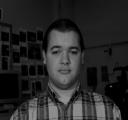

In [ ]:
yes = list(data_dir.glob('no_new/*'))
Image.open(str(yes[1]))



In [ ]:
batch_size = 16
img_height = 128
img_width = 128

train_datagen = ImageDataGenerator(rescale=1./255,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle = True,
    seed = 123,
    class_mode='binary',
    subset='training') # set as training data

valid_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle = True,
    seed = 123,
    class_mode='binary',
    subset='validation') # set as validation data

# print(valid_generator.samples//batch_size)

Found 424 images belonging to 2 classes.
Found 105 images belonging to 2 classes.


In [ ]:
classes = ['no', 'yes']

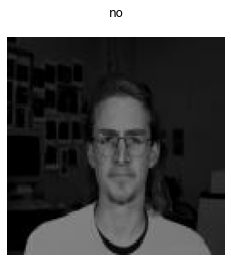

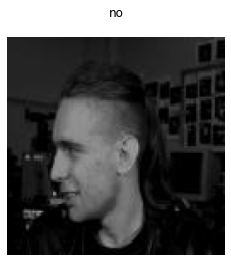

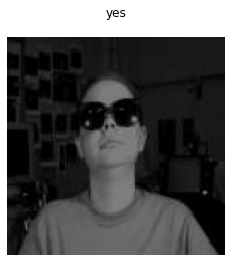

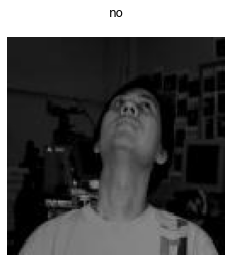

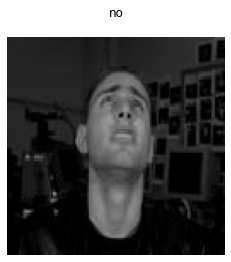

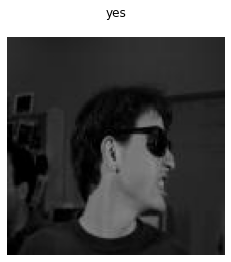

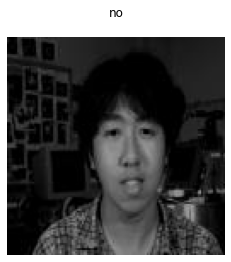

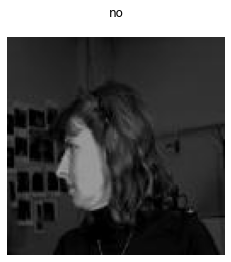

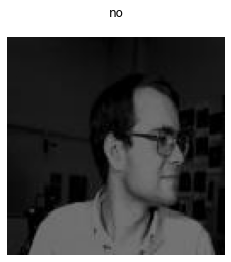

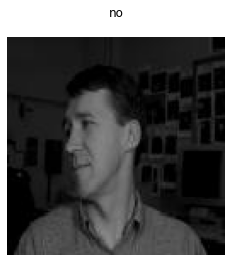

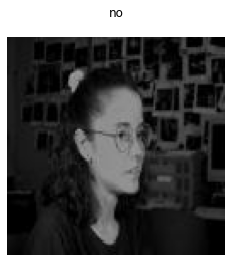

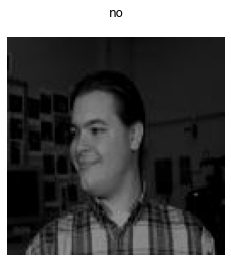

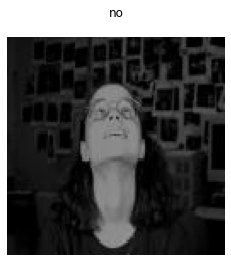

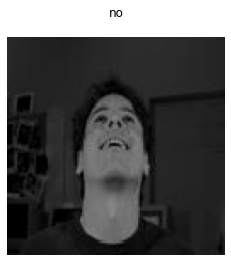

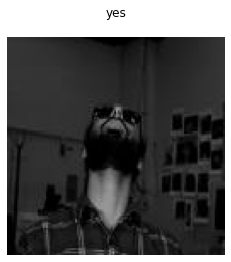

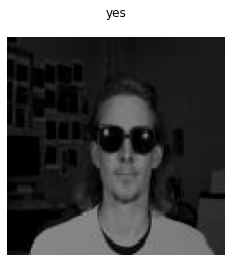

In [ ]:

import matplotlib.pyplot as plt

def imshow(image,title = '',caption = ''):
  
  image = np.clip(image, 0, 1)
  # Plot
  fig, ax = plt.subplots(1, 1, figsize = (4, 4))
  ax.imshow(image)
  ax.axis('off')
  plt.title(title + '\n' + caption)

# to visualise a batch
images,indices = next(iter(train_generator)) 

for image,index in zip(images,indices):
  imshow(image,title= classes[int(index)]) 


In [ ]:
model = Sequential([
    layers.Conv2D(32, 3, padding='same', input_shape=(img_height, img_width,3)),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Conv2D(64,3,padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(),
    layers.ZeroPadding2D(padding=(2,2)),
    layers.Conv2D(128,5,padding='valid'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Conv2D(64,3,padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Conv2D(16,3,padding='same'),
    layers.ReLU(),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(1024,activation='relu'),
    layers.Dense(256),
    layers.Dense(1, activation= 'sigmoid')  
])

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate = 1e-4,beta_1 = 0.1,beta_2 = 0.999)

model.compile(optimizer= optimizer,
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits= True),
                  metrics=['accuracy'])

filepath = 'drive/My Drive/sunglass/best.hdf5'

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
re_lu_6 (ReLU)               (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
re_lu_7 (ReLU)               (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 64)       

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=100,
    validation_data=valid_generator,
    validation_steps= valid_generator.samples// batch_size,
    callbacks = [checkpoint]
)

Epoch 1/100
26/26 [==============================] - ETA: 0s - loss: 0.6886 - accuracy: 0.5466
Epoch 00001: val_accuracy improved from -inf to 0.54167, saving model to drive/My Drive/sunglass/best.hdf5
26/26 [==============================] - 3s 110ms/step - loss: 0.6886 - accuracy: 0.5466 - val_loss: 0.7118 - val_accuracy: 0.5417
Epoch 2/100
26/26 [==============================] - ETA: 0s - loss: 0.6295 - accuracy: 0.7132
Epoch 00002: val_accuracy did not improve from 0.54167
26/26 [==============================] - 2s 86ms/step - loss: 0.6295 - accuracy: 0.7132 - val_loss: 0.7015 - val_accuracy: 0.5000
Epoch 3/100
26/26 [==============================] - ETA: 0s - loss: 0.5530 - accuracy: 0.9044
Epoch 00003: val_accuracy did not improve from 0.54167
26/26 [==============================] - 2s 87ms/step - loss: 0.5530 - accuracy: 0.9044 - val_loss: 0.6942 - val_accuracy: 0.5104
Epoch 4/100
26/26 [==============================] - ETA: 0s - loss: 0.5324 - accuracy: 0.9485
Epoch 00004:

In [ ]:
# model.load_weights("weights.best.hdf5") for loading

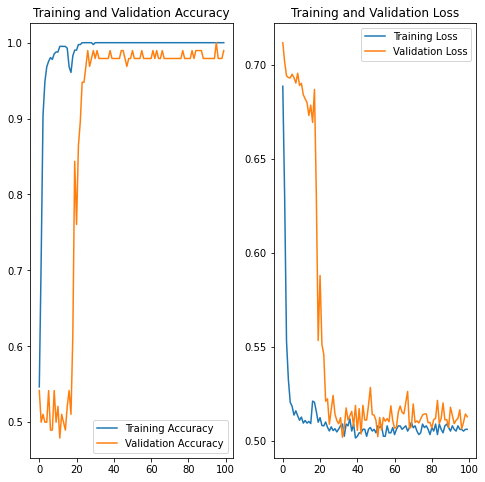

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
path_dir = 'drive/My Drive/sunglass/test'
path_dir = pathlib.Path(path_dir)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    path_dir,
    target_size=(img_height, img_width),
    batch_size= 95,
    class_mode='binary')

Found 95 images belonging to 2 classes.


In [ ]:
model.load_weights('drive/My Drive/sunglass/best.hdf5')

model.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy'])

scores = model.evaluate(test_generator, verbose=0)

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 95.79%


In [ ]:
model.compile(optimizer="sgd",
              loss="binary_crossentropy",
              metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

scores1 = model.evaluate(test_generator, verbose=0)

print("%s: %.2f" % (model.metrics_names[1], scores1[1]))
print("%s: %.2f" % (model.metrics_names[2], scores1[2]))

precision_4: 1.00
recall_4: 0.92
